In [1]:
%matplotlib inline
import quandl
import seaborn as sns
import pandas as pd
token='QWe8iSbyAFzRuod2aroM'

In [2]:
import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [15]:
mkts={'SP 500':'CHRIS/CME_SP1',
      'US 10Y':'CHRIS/CME_TY1',
      'Crude Oil':'CHRIS/CME_CL1',
      'Eurostoxx 50':'CHRIS/EUREX_FESX1',
      'Dollar Index':'CHRIS/ICE_DX1',
      'US 3M T-bills':'FRED/DTB3',
      'Fed Funds Effective Rate':'FRED/DFF',
      'US Investment Grade':'COM/CDXNAIG',
      'US High Yield':'COM/CDXNAHY',
      'US 20 Year Treasury':'FRED/DGS20',
      'TED Spread':'FRED/TEDRATE',
      #'EUR':'CURRFX/USDEUR',
      #'JPY':'CURRFX/USDJPY',
      #'GBP':'CURRFX/GBPUSD',
     # 'CHF':'CURRFX/USDCHF',
     # 'BRL':'CURRFX/USDBRL',
     # 'CNY':'CURRFX/CNYUSD',
     # 'RUB':'CURRFX/RUBUSD',
     # 'TRY':'CURRFX/TRYUSD'
      }


In [19]:
data_index=pd.DataFrame()
for m in mkts.keys():
    try:
        data_index[m]=quandl.get(mkts[m],authtoken=token).Last
    except:
        try:
            data_index[m]=quandl.get(mkts[m],authtoken=token).Settle
        except:
            try:
                data_index[m]=quandl.get(mkts[m],authtoken=token).Value
            except:
                try:
                    data_index[m]=quandl.get(mkts[m],authtoken=token).value
                except:
                    data_index[m]=quandl.get(mkts[m],authtoken=token).Rate
data_pct=data_index.pct_change()     

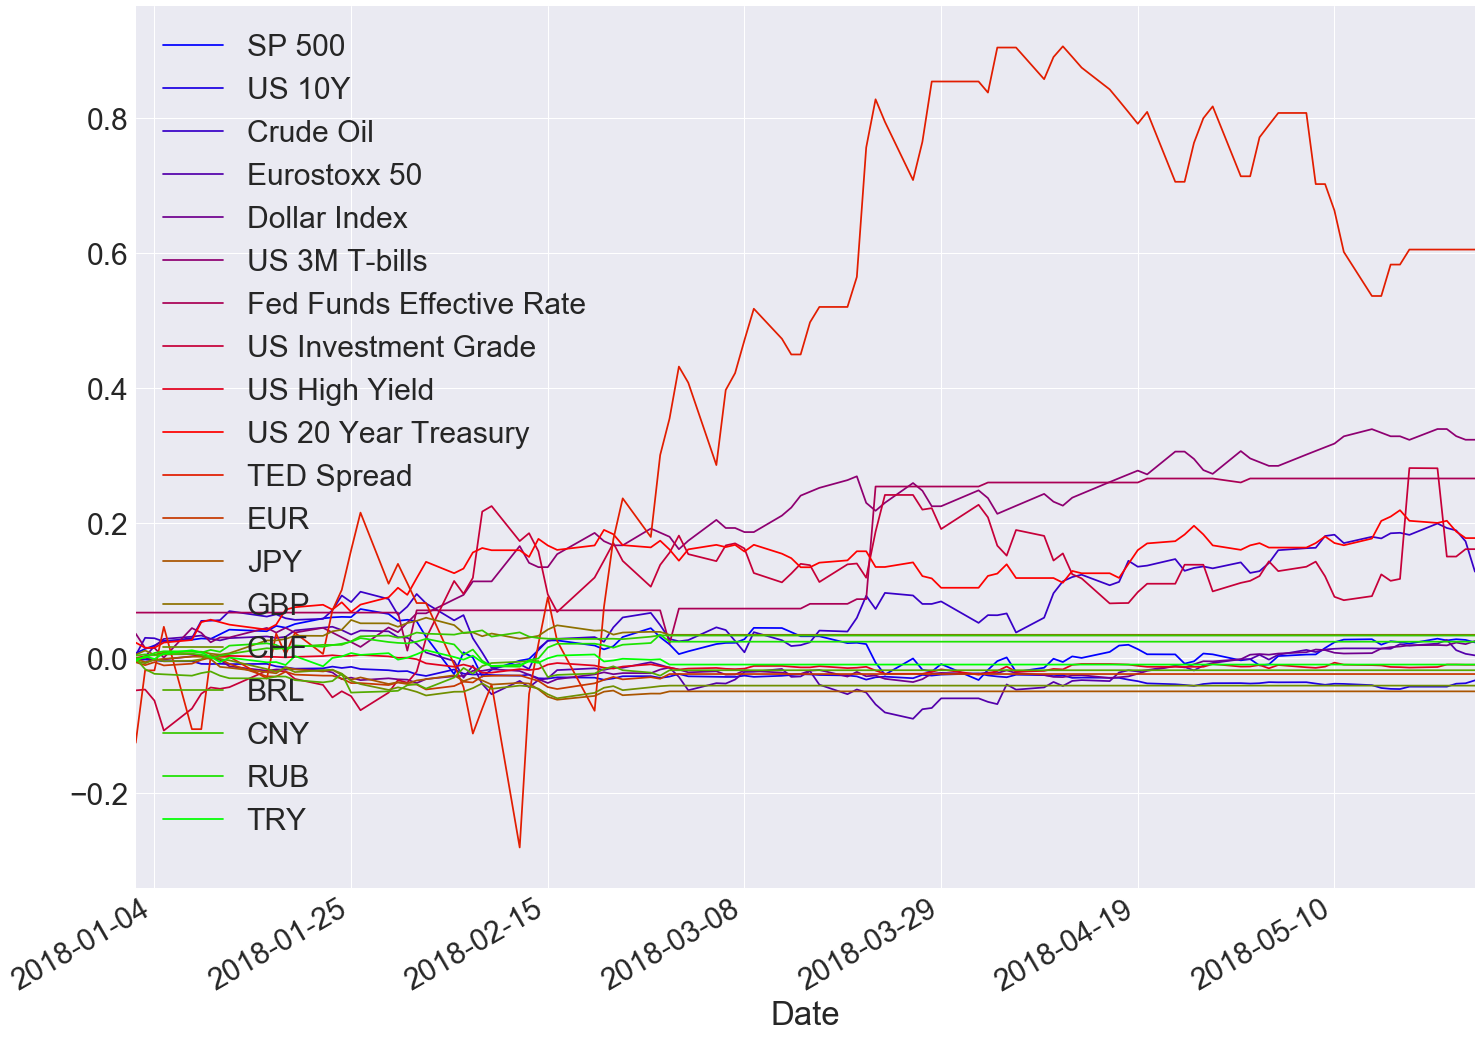

In [20]:
data_pct['2018':].cumsum().ffill().plot(colormap='brg')

In [65]:
mu=pd.ewma(data_pct,60)
sd=pd.ewmstd(data_pct,20)
zscores=(data_pct-mu)/sd

/Users/mrefermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=60,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.
/Users/mrefermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=20,min_periods=0,adjust=True,ignore_na=False).std(bias=False)
  


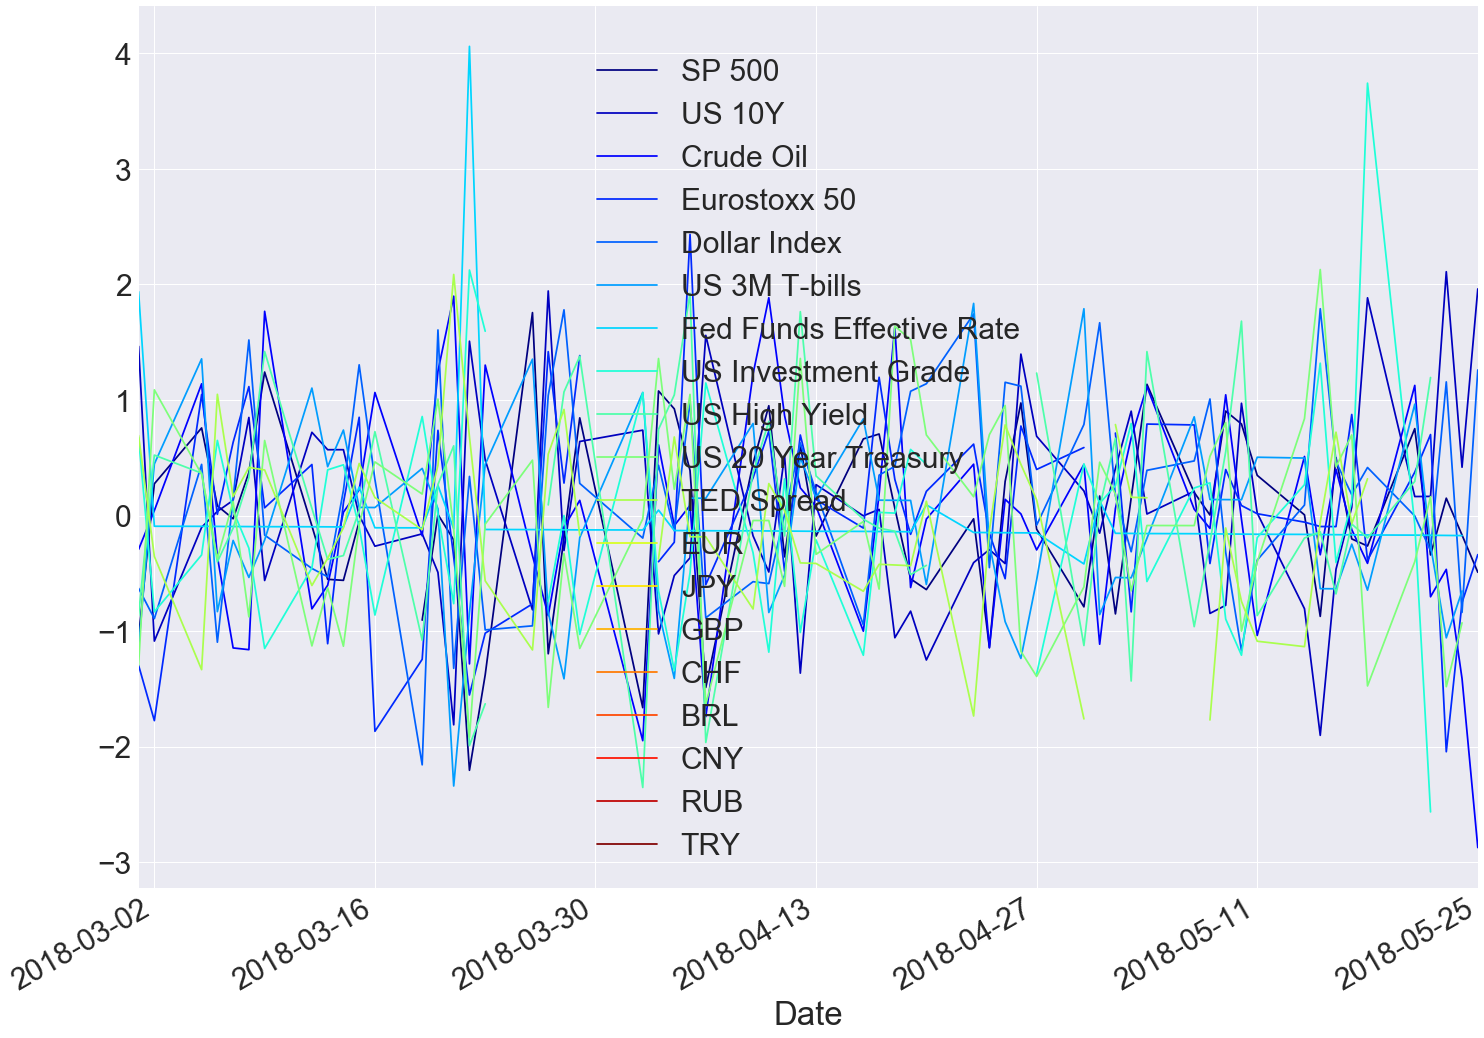

In [66]:
zscores['2018-3':].plot(colormap='jet')

In [67]:
last=zscores.iloc[-2].dropna().sort_values()


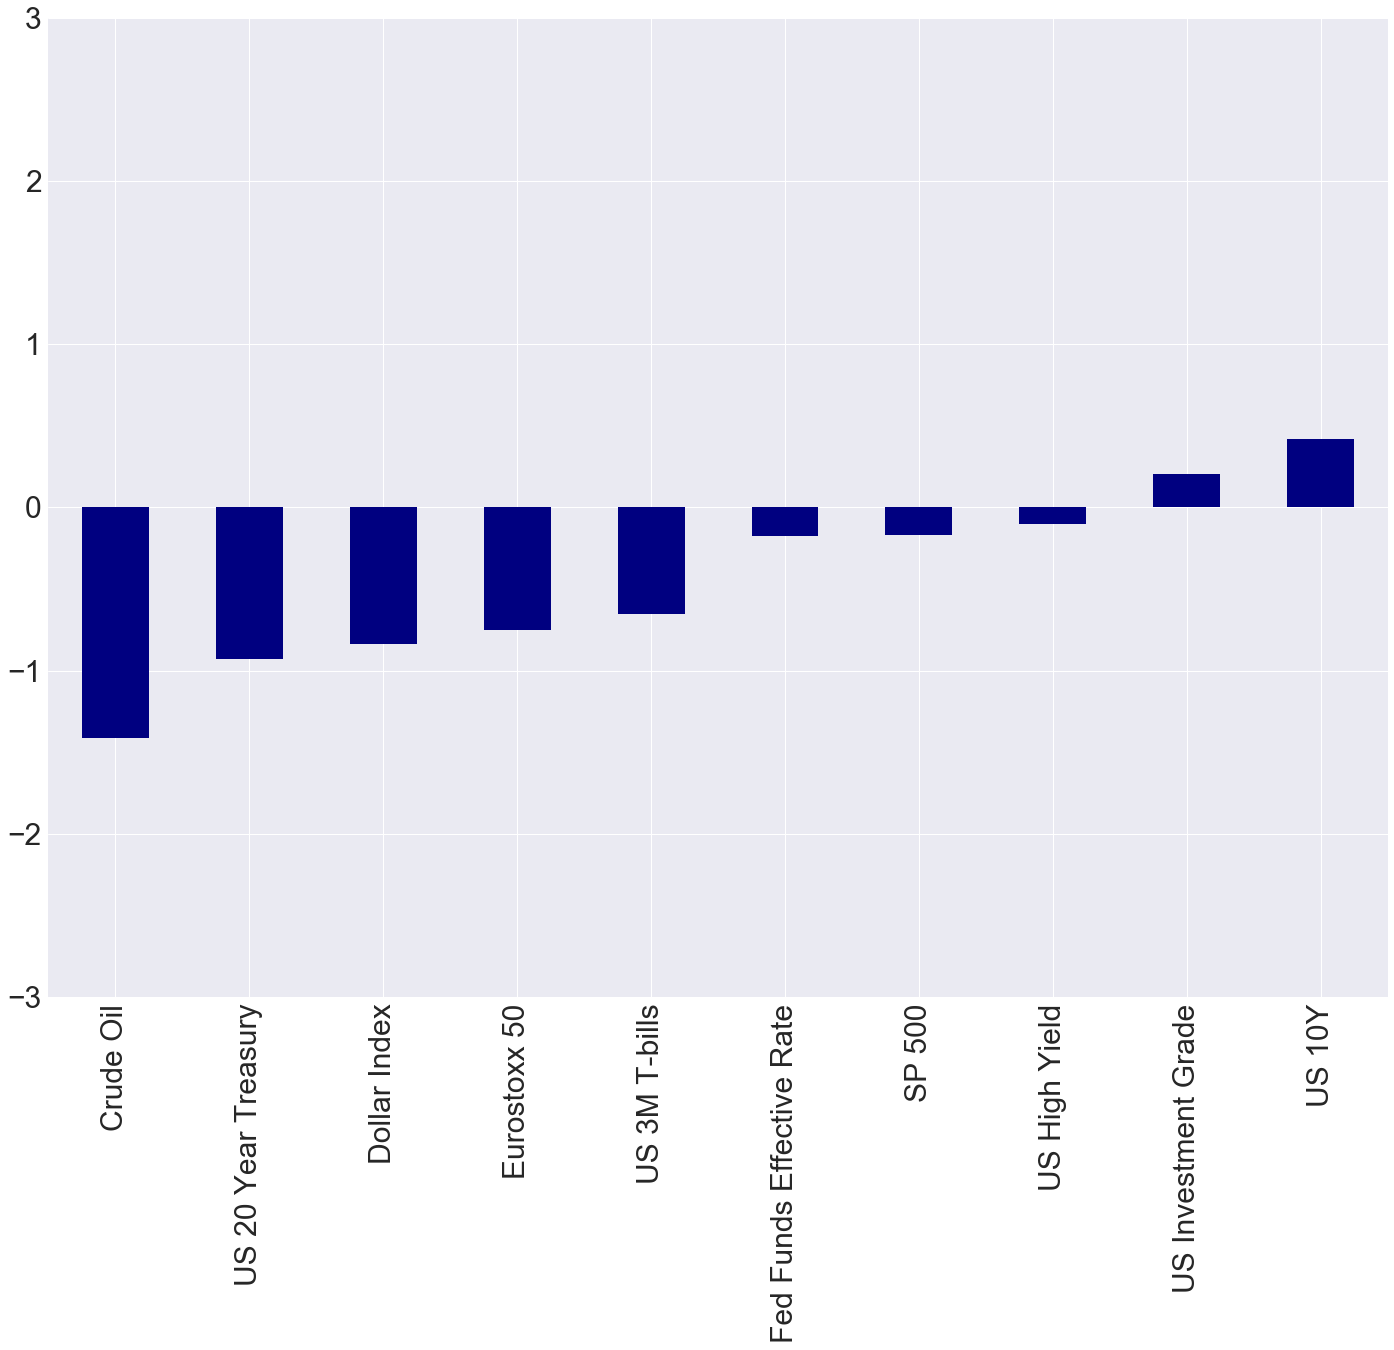

In [72]:
last.plot(kind='bar',colormap='jet',ylim=[-3,3])

In [76]:
quandl.get_table('WIKI/PRICES', ticker='JCP')

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,JCP,1982-01-04,28.25,28.5000,28.0000,28.38,117200.0,0.0,1.0,2.267475,2.287541,2.247409,2.277909,468800.0
1,JCP,1982-01-05,28.38,28.5000,28.2500,28.25,90700.0,0.0,1.0,2.277909,2.287541,2.267475,2.267475,362800.0
2,JCP,1982-01-06,28.50,28.6200,28.3800,28.38,65900.0,0.0,1.0,2.287541,2.297173,2.277909,2.277909,263600.0
3,JCP,1982-01-07,29.00,29.2500,28.6200,29.00,134600.0,0.0,1.0,2.327673,2.347739,2.297173,2.327673,538400.0
4,JCP,1982-01-08,29.12,29.2500,28.8800,29.25,94200.0,0.0,1.0,2.337305,2.347739,2.318041,2.347739,376800.0
5,JCP,1982-01-11,28.75,29.0000,28.5000,28.50,134000.0,0.0,1.0,2.307607,2.327673,2.287541,2.287541,536000.0
6,JCP,1982-01-12,28.62,28.7500,28.5000,28.62,46200.0,0.0,1.0,2.297173,2.307607,2.287541,2.297173,184800.0
7,JCP,1982-01-13,28.00,28.6200,27.2500,27.38,135000.0,0.0,1.0,2.247409,2.297173,2.187210,2.197645,540000.0
8,JCP,1982-01-14,27.62,27.7500,27.3800,27.62,20800.0,0.0,1.0,2.216908,2.227343,2.197645,2.216908,83200.0
